In [1]:
# Packages
from nltk.stem.wordnet import WordNetLemmatizer
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tag import pos_tag
import json, re , string
import pandas as pd
import tweepy
import random
import nltk
import os 
# nltk.download()
# nltk.download('punkt') # I need 
# nltk.download('stopwords')

## Task 1: Execute Tweet Harvest with Standard API

In [2]:
# # Authentication keys/tokens (STS dev)
# consumer_key = 'HU5D0SosXuzWisbWjD3XhxWPu'
# consumer_secret = '3lm4ujYqWc82yx25biI6HhEO4Z6nfrDgZDsqLl8BigRwOlLjFc'

# token = '1381657141044334596-NAbihelvjOIkXZPQs1HfkxbSeWO4oZ'
# token_secret = '9fbdTYO5GzO18IM0JsLwoIDt1OtpWURh1PTBO8Xxasr4S'

In [3]:
# # Authorization variable
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(token, token_secret) 

In [4]:
# api = tweepy.API(auth, wait_on_rate_limit=True)

Since the 'tweepy.Cursor' function pulls from the most recent tweets I casted a huge net, catching 1000 tweets, and grabbed a random sample size of 300 tweets.  

The script was executed via the Bash command `python twitter_grab.py`. 

<i> Note: The tweets cut off after a ceratain lenght</i> 

In [5]:
# path = os.getcwd()
# os.listdir(path) # verifying files are in the correct directory. 

## Task 2: Extract and Analyze

* Construct visualization with top-20 terms. 

In [6]:
# Opening the files 
filename = 'my_hero_tweets.txt'
f = open(filename)
raw = f.read()
f.close()

# type(raw)
# raw # Checking the structure

In [7]:
# tokenize text
tokens_TI = nltk.word_tokenize(raw)

# remove all tokens that are not alphabetic (i.e. punctuation)
words = [word for word in tokens_TI if word.isalpha()]

# put all words to lower case
words = [w.lower() for w in words]
# words

In [8]:
# Checking the type and length of 'words'
print('This object is a: ', type(words))
print('It contains %d tokens.' %len(words))

This object is a:  <class 'list'>
It contains 5832 tokens.


In [9]:
# Adding additional stop words
to_remove = {'my','MY',"My"}
stop_words = list(set(stopwords.words('english')).difference(to_remove))
# I want the word "my"


stop_words.extend(['rt','RT' 'retweet', 'http', 'https'])
# print(len(stop_words))


In [10]:
# Remove stops words from the My Hero Academic (Boku no Hero) token list
words = [w for w in words if not w in stop_words]
# print('Our word list now contains %d tokens.' %len(words))
words

['satogeto',
 'manifesting',
 'my',
 'hero',
 'academia',
 'canon',
 'ships',
 'instead',
 'ending',
 'focuses',
 'students',
 'vizmedia',
 'latest',
 'volume',
 'my',
 'hero',
 'academia',
 'soars',
 'new',
 'heights',
 'tomsweeneyinc',
 'full',
 'metal',
 'alchemist',
 'my',
 'hero',
 'academia',
 'mixed',
 'together',
 'got',
 'tumblr',
 'refugees',
 'panties',
 'my',
 'boyfriend',
 'asked',
 'my',
 'hero',
 'academia',
 'told',
 'deku',
 'part',
 'wait',
 'vizmedia',
 'latest',
 'volume',
 'my',
 'hero',
 'academia',
 'soars',
 'new',
 'heights',
 'satogeto',
 'manifesting',
 'my',
 'hero',
 'academia',
 'canon',
 'ships',
 'instead',
 'ending',
 'focuses',
 'students',
 'vizmedia',
 'latest',
 'volume',
 'my',
 'hero',
 'academia',
 'soars',
 'new',
 'heights',
 'satogeto',
 'manifesting',
 'my',
 'hero',
 'academia',
 'canon',
 'ships',
 'instead',
 'ending',
 'focuses',
 'students',
 'satogeto',
 'manifesting',
 'my',
 'hero',
 'academia',
 'canon',
 'ships',
 'instead',
 'endin

In [11]:
# Determines the frequency for each token
TI_freqs = nltk.FreqDist(words)
# print(type(TI_freqs))

# for keys, values in TI_freqs.items():
#     print(keys,values)

In [12]:
# Use built-in method `most_common` to extract top-n words
n = 20 # Most common 
TI_freqs.most_common(n)

# Take a bi-gram perspective
bigrams = nltk.bigrams(words) # Bigrams object 
# bigrams

#compute frequency distribution for all the bigrams in the text
bigrams_freq = nltk.FreqDist(bigrams)

top_n = bigrams_freq.most_common(n) # Pulling the top n 

In [13]:
# Creating a dictionary that has the top 20 used words
sub_dict = {}
for keys, values in dict(top_n).items():
#     print(keys, values)
    for key_1 in keys:
#         print(key_1, values)
        if key_1 not in sub_dict: 
            sub_dict[key_1] = values
        else: # There are multiple words that are related. The conditional is to make sure they are counted the same.
            sub_dict[key_1] = sub_dict[key_1] + values
# len(sub_dict)
# sub_dict

In [14]:
# Plotting  
# Source: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5#_=_
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [15]:
wordcloud = WordCloud(width = 3000, height = 2000, 
                      random_state=1, background_color='black', colormap='rainbow', 
                      collocations=False).generate_from_frequencies(sub_dict)

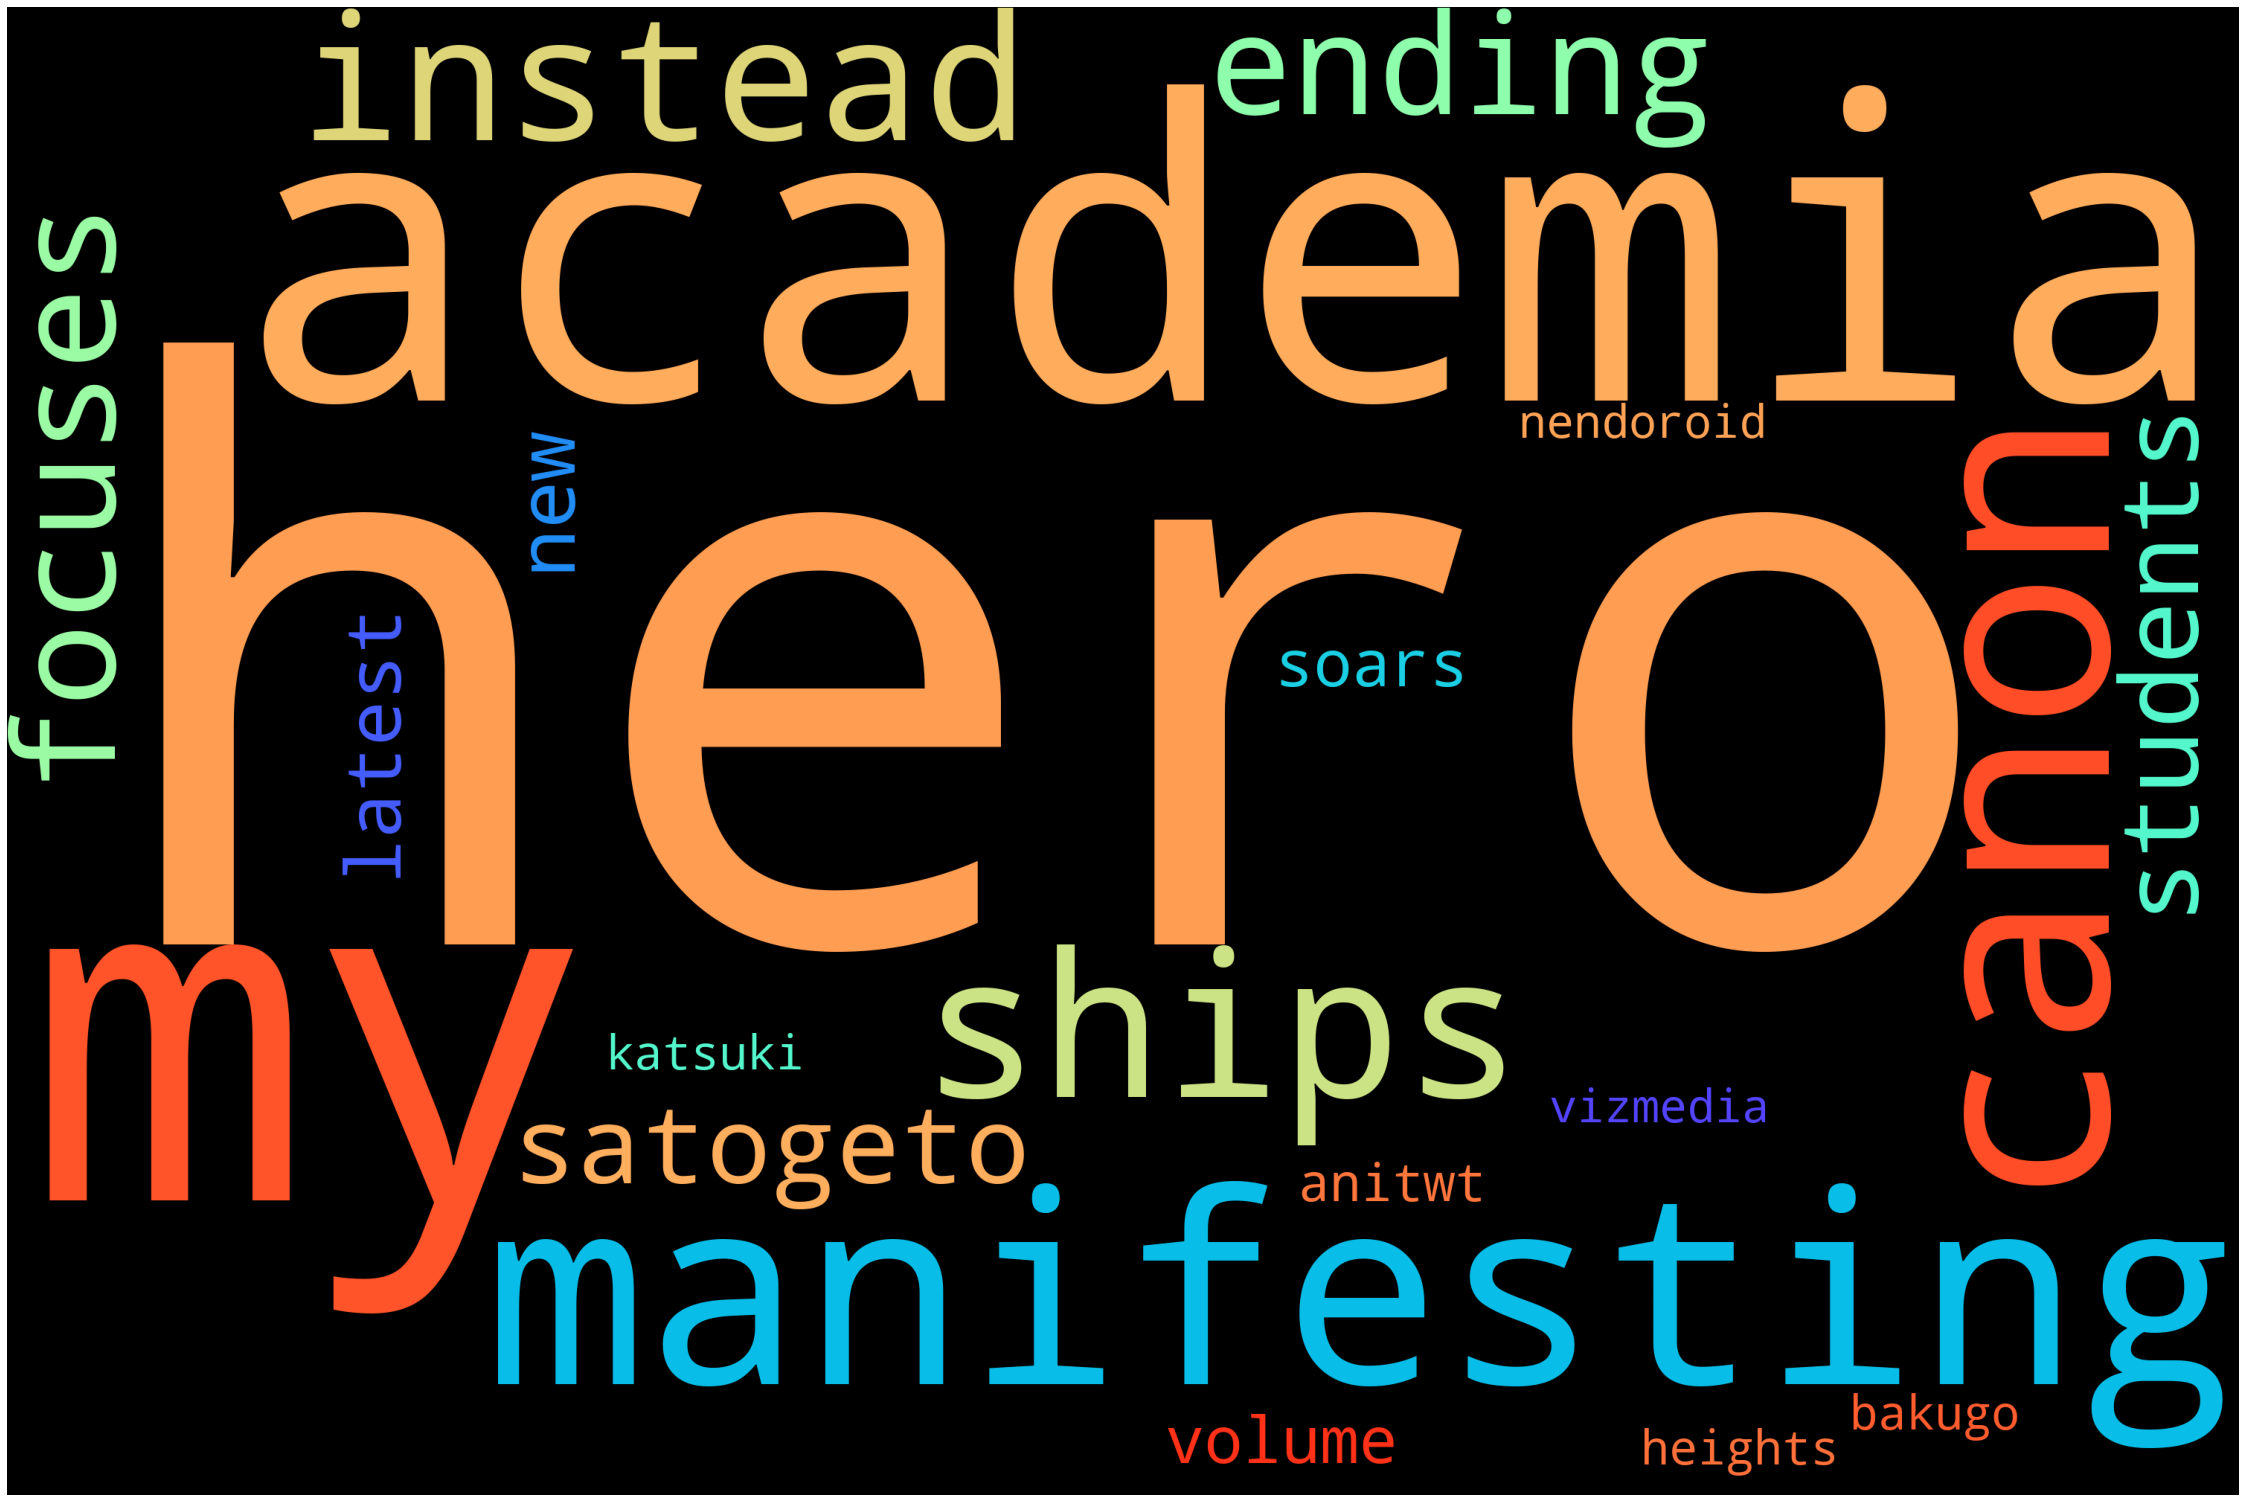

In [16]:
# Plot
plot_cloud(wordcloud)

As displayed in the picture, the more frequent a word was used the larger it is shown. The top 5 words in `my hero academia` twitter pull were "hero", "academia", "ships", "manifesting", and "canon".  This makes sense because the name of the anime (show) is "My Hero Academia". My is not displayed because it is a `stop-word`. The remaining three words are representations of the conversations being held in world of Boku no Hero. This week manga is all about the canonization of various characters, specifically Sato and Bakugo, manifesting greater abilities.  

In [17]:
i = 0
top_n_words = 5
print("Top", top_n_words, "words repeated were:")
for keys in sorted(sub_dict, key=sub_dict.get, reverse = True):
    i += 1
    print(i,keys, sub_dict[keys])
    if i == top_n_words:
        break

Top 5 words repeated were:
1 hero 509
2 my 362
3 academia 361
4 manifesting 178
5 canon 178


## Task 3: Determine the Sentiment of Streaming Sample

In [18]:
raw_tweets = open('StreamSample.txt', 'r') # raw file sample
tweets = [] # list container

for line in raw_tweets:
    try:
        if line.strip():
            tweets.append(json.loads(line))
    except:
        continue
len(tweets)

2839

In [19]:
# Creating a data structure that holds the desired columns
new_tweets = []
for i in range(len(tweets)):
    pairs = {
    'created_at'     : tweets[i]['created_at'], # Date times 
    'id'             :tweets[i]['id'],
    'text'           :tweets[i]['text'],
    'sentiment_score': 0,   
    'sentiment_type': ""   
    }
    
    if tweets[i]['truncated'] == True:
        pairs['text'] = tweets[i]['extended_tweet']['full_text']
    
    new_tweets.append(pairs)
    
# Putting information into a dataframe     
columns_names = ["created_at", "id", "text","sentiment_score","sentiment_type"]
tweets_df = pd.DataFrame(new_tweets, columns=columns_names)
tweets_df.head()

,created_at,id,text,sentiment_score,sentiment_type
0,Tue Apr 27 23:00:11 +0000 2021,1387179800943423488,RT @sreekyshooter: If you're like me and feeli...,0,
1,Tue Apr 27 23:00:11 +0000 2021,1387179801207742471,RT @SenKatyG: Last week we found out that 84% ...,0,
2,Tue Apr 27 23:00:11 +0000 2021,1387179801593716736,RT @mtsw: MMA meatheads will take a cocktail o...,0,
3,Tue Apr 27 23:00:12 +0000 2021,1387179802268942339,RT @The_RGA: .@KristiNoem opposes Biden’s plan...,0,
4,Tue Apr 27 23:00:12 +0000 2021,1387179802285666306,RT @NHSMillion: We don’t hear enough about jus...,0,


In [20]:
path = os.getcwd() # Current path
os.chdir("/Users/jonathanshepherd/OneDrive/Education/NPS/Classes/Quarter7/OA3802_Comp_III/Labs/lab3_sakai/AFINN")

In [21]:
file = 'AFINN-111.txt'
afinn = open(file)
scores = {}
for line in afinn:
#     print(line)
    word, score = line.split("\t")
    scores[word] = int(score)
# scores

In [22]:
for i in range(tweets_df.shape[0]):
    tokens_TI = nltk.word_tokenize(tweets_df.iloc[i,2])

    # remove all tokens that are not alphabetic (i.e. punctuation)
    words = [word for word in tokens_TI if word.isalpha()]

    # put all words to lower case
    words = [w.lower() for w in words]
    
#     print(words)
    for q in words:
        if q in scores.keys():
#             print(q)
            tweets_df.iloc[i,3] = tweets_df.iloc[i,3] + scores[q] 
#             print("The values",tweets_df.iloc[i,3])
#     break

In [23]:
tweets_df.head(10)

,created_at,id,text,sentiment_score,sentiment_type
0,Tue Apr 27 23:00:11 +0000 2021,1387179800943423488,RT @sreekyshooter: If you're like me and feeli...,-2,
1,Tue Apr 27 23:00:11 +0000 2021,1387179801207742471,RT @SenKatyG: Last week we found out that 84% ...,2,
2,Tue Apr 27 23:00:11 +0000 2021,1387179801593716736,RT @mtsw: MMA meatheads will take a cocktail o...,0,
3,Tue Apr 27 23:00:12 +0000 2021,1387179802268942339,RT @The_RGA: .@KristiNoem opposes Biden’s plan...,0,
4,Tue Apr 27 23:00:12 +0000 2021,1387179802285666306,RT @NHSMillion: We don’t hear enough about jus...,0,
5,Tue Apr 27 23:00:12 +0000 2021,1387179802281582592,The B.1.617 variant raised alarms after it was...,0,
6,Tue Apr 27 23:00:12 +0000 2021,1387179802818383874,I can't believe this needs to be said. Why wou...,0,
7,Tue Apr 27 23:00:12 +0000 2021,1387179802076012544,"“I want to keep my patients, colleagues and fa...",4,
8,Tue Apr 27 23:00:12 +0000 2021,1387179803023917060,RT @FacesOfCOVID: ONE YEAR AGO TODAY.\n\nROBER...,-3,
9,Tue Apr 27 23:00:12 +0000 2021,1387179803200131077,Pfizer at-home Covid pill could be available b...,0,


For this task I stuck with COVID as a key phase. I thought a Pandas' data frame was the easiest and most concise way to structure the data. After capturing the desired columns, I then bought the `AFINN-111` file in as a dictionary for easy token matching.  I order to ensure I did not forget about words being duplicated with in a tweet, I decided to have each word (token) with in the tweet try and match itself to the `AFINN-111` list. If there was a match points would be added to the sentiment score. Upon obtaining the total `sentiment_score` a `sentiment_type` was drafted. Negative if `sentiment_score` < 0, positive if `sentiment_score` > 0, and neutral if `sentiment_score` is 0. 

## Task 4: Analyze and Assess: (30 points)

In [24]:
for i in range(tweets_df.shape[0]):
#     print((tweets_df.iloc[i,3]))
    if tweets_df.iloc[i,3] < 0:
#         print(i)
        tweets_df.iloc[i,4] = 'negative'
    elif tweets_df.iloc[i,3] > 0:
        tweets_df.iloc[i,4] = 'positive'
    else:
        tweets_df.iloc[i,4] = 'neutral'
tweets_df.head(20)
tweets_df.shape

(2839, 5)

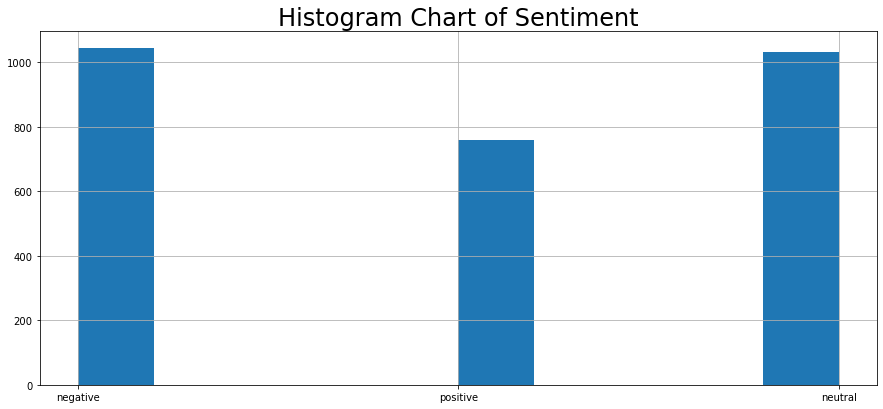

In [25]:
plt.figure(figsize = (15, 6.5))
plt.title('Histogram Chart of Sentiment', size= 24)
tweets_df['sentiment_type'].hist()
plt.show()

As displayed in the chart above, this set of  tweets surrounding COVID has an overall neutral sentiment. 